In [2]:
import pandas as pd
import textattack
import matplotlib.pyplot as plt
from textattack.augmentation import EmbeddingAugmenter, CharSwapAugmenter
from tqdm import tqdm

In [3]:
df1 = pd.read_excel('../Data_Datasets_Unbalanced_dataset_unbalanced_4000.xlsx')
df2 = pd.read_excel('../dataset_gpt_unbalanced_16000.xlsx')

df = pd.concat([df1, df2], ignore_index=True)
df.head()

,ID,review,label,new_label,remove_all_stopwords,remove_some_stopwords,stemming,lemmatization,no_stopwords
0,1,Not able to add freinds. It show something wen...,bug report,0,able add freinds show something went wrong rec...,not able add freinds show something went wrong...,not abl to add freind it show someth went wron...,not able to add freinds it show something went...,NaN
1,2,Calls keep dropping for no reason and is super...,bug report,0,calls keep dropping reason super annoying,calls keep dropping no reason super annoying,call keep drop for no reason and is super annoy,call keep dropping for no reason and is super ...,NaN
2,3,Can't access to my account solve this issue im...,bug report,0,cant access account solve issue immediately,cant access account solve issue immediately,cant access to my account solv thi issu immedi,cant access to my account solve this issue imm...,NaN
3,4,I don't know what's wrong with my own WhatsApp...,bug report,0,dont know whats wrong whatsapp working want si...,dont know whats wrong whatsapp not working wan...,i dont know what wrong with my own whatsapp it...,i dont know whats wrong with my own whatsapp i...,NaN
4,5,Cannot record audio while taking video,bug report,0,cannot record audio taking video,cannot record audio taking video,cannot record audio while take video,cannot record audio while taking video,NaN


user experience    6593
rating             5740
feature request    4410
bug report         3257
Name: label, dtype: int64


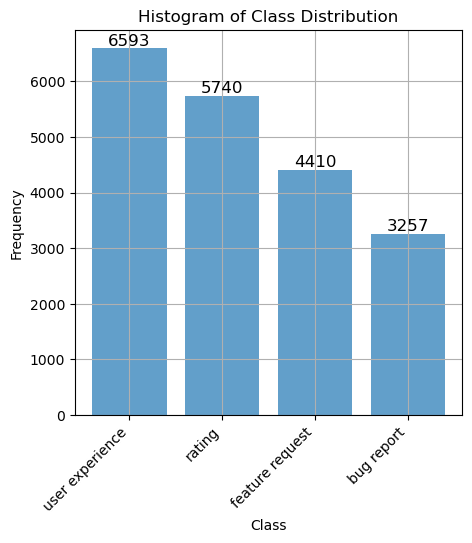

In [4]:
plt.figure(figsize=(5, 5))

# Get class labels and counts
# class_labels = df['label'].unique()
class_counts = df['label'].value_counts()
print(class_counts)

labels = []
counts = []
for label, count in class_counts.items():
    labels.append(label)
    counts.append(count)

# Create the bar plot
plt.bar(labels, counts, alpha=0.7)

# Annotate bars with exact values
for i, value in enumerate(class_counts):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)

# Set labels and title
plt.title('Histogram of Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

In [5]:
def augment_data(df, label, n=5):
    """
    Augments the data to balance class distribution.
    
    Args:
    df (pd.DataFrame): The input dataframe with 'review' and 'label' columns.
    label (int or str): The label of the class to augment.
    n (int): Number of random examples to augment.

    Returns:
    pd.DataFrame: The augmented dataframe.
    """
    
    # Filter the dataframe to get rows with the specified label
    class_df = df[df['label'] == label]

    # Select n random examples from the class
    random_examples = class_df.sample(n=n, random_state=42)
    
    print("Fetched ", n, " random examples")

    # Initialize the augmenters
    embedding_augmenter = EmbeddingAugmenter()
    char_swap_augmenter = CharSwapAugmenter()

    # Create lists to store augmented reviews and their labels
    augmented_reviews = []
    augmented_labels = []

    # Generate augmented examples and add them to the lists
    for review in tqdm(random_examples['review'], desc="Augmenting data"):
        augmented_review_1 = embedding_augmenter.augment(review)[0]  # Generate one example with EmbeddingAugmenter
        augmented_review_2 = char_swap_augmenter.augment(review)[0]  # Generate one example with CharSwapAugmenter
        augmented_reviews.extend([augmented_review_1, augmented_review_2])
        augmented_labels.extend([label, label])

    # Create a new dataframe for the augmented data
    augmented_df = pd.DataFrame({
        'review': augmented_reviews,
        'label': augmented_labels
    })

    # Concatenate the original dataframe with the augmented dataframe
    augmented_df = pd.concat([df, augmented_df], ignore_index=True)

    return augmented_df

In [7]:
augmented_df = augment_data(df, 'rating', 426)

Fetched  426  random examples


Augmenting data: 100%|██████████| 426/426 [44:37<00:00,  6.28s/it]    


In [8]:
augmented_df = augment_data(augmented_df, 'feature request', 1091)

Fetched  1091  random examples


Augmenting data: 100%|██████████| 1091/1091 [53:31<00:00,  2.94s/it] 


In [9]:
augmented_df = augment_data(augmented_df, 'bug report', 1668)

Fetched  1668  random examples


Augmenting data: 100%|██████████| 1668/1668 [1:38:50<00:00,  3.56s/it]  


bug report         6593
user experience    6593
feature request    6592
rating             6592
Name: label, dtype: int64


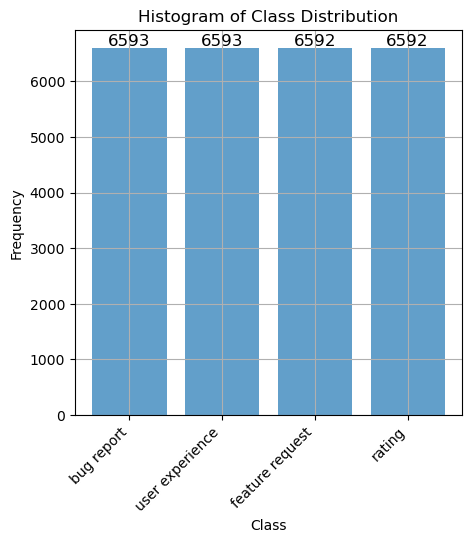

In [12]:
plt.figure(figsize=(5, 5))

# Get class labels and counts
# class_labels = df['label'].unique()
class_counts = augmented_df['label'].value_counts()
print(class_counts)

labels = []
counts = []
for label, count in class_counts.items():
    labels.append(label)
    counts.append(count)

# Create the bar plot
plt.bar(labels, counts, alpha=0.7)

# Annotate bars with exact values
for i, value in enumerate(class_counts):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)

# Set labels and title
plt.title('Histogram of Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

In [11]:
augmented_df.to_excel('augmented_data.xlsx', index=False)